# Name : Kanishk Mehta

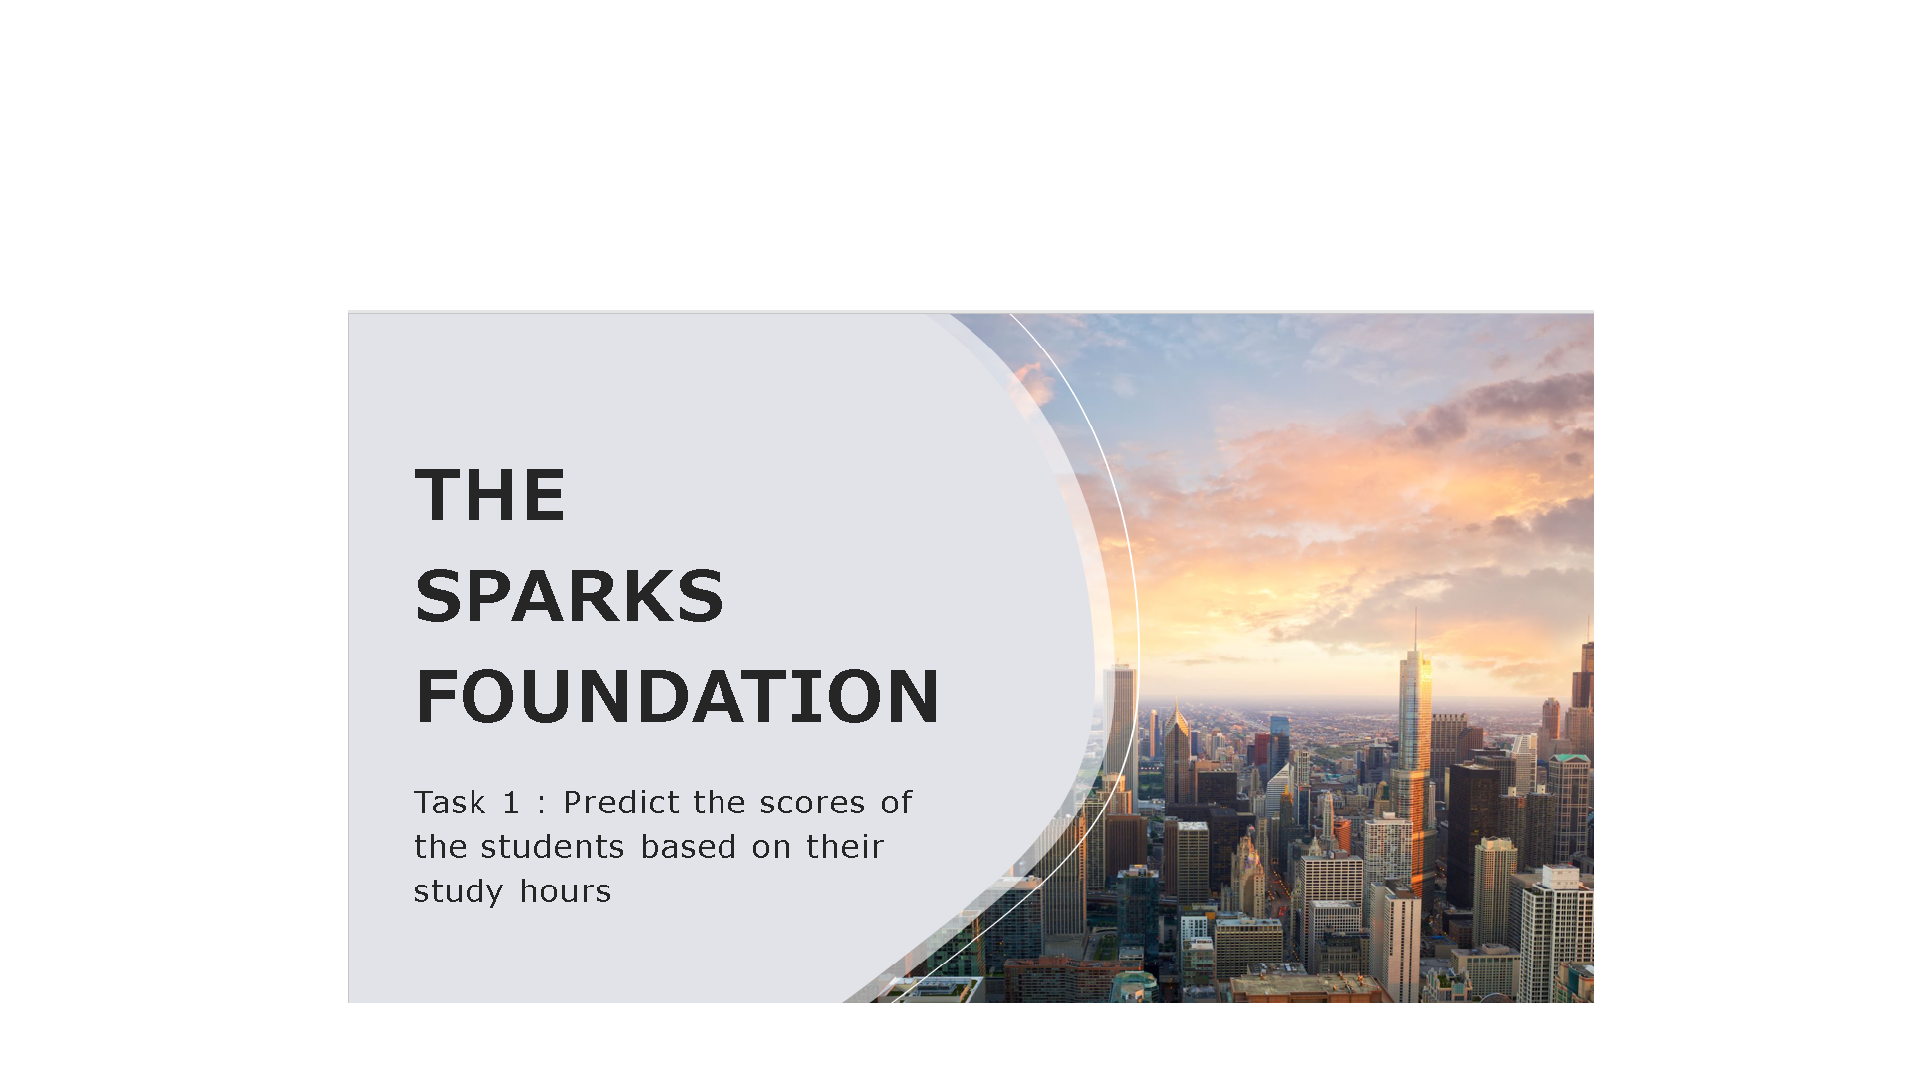

## TASK 1 : Sparks Foundation

In [1]:
# warnings 
import warnings 
warnings.filterwarnings('ignore')

# Data toolkit libraries
import numpy as np
import pandas as pd
import random as rd

# Data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

# Scikit-Learn Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Statsmodels library
import statsmodels.api as sm

%matplotlib inline

# Understanding the Data

In [2]:
# Loading the dataset
scores = pd.read_csv('http://bit.ly/w-data')

scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking the statistical description of the data

scores.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
1%,1.196000,17.720000
5%,1.580000,20.200000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
95%,8.820000,87.600000


In [4]:
# Checking the dataset informatrics 
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Skewness in the data
scores.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

# EDA 

## Missing values Check

In [6]:
# Checking the missing value percentage for the features

Missing_values = pd.DataFrame(100*(scores.isnull().sum()/scores.shape[0]),columns=['Missing_%'])

Missing_values

,Missing_%
Hours,0.0
Scores,0.0


### <font color='purple'>Comment :</font>
There are no missing records in the dataset.

## Outliers Check

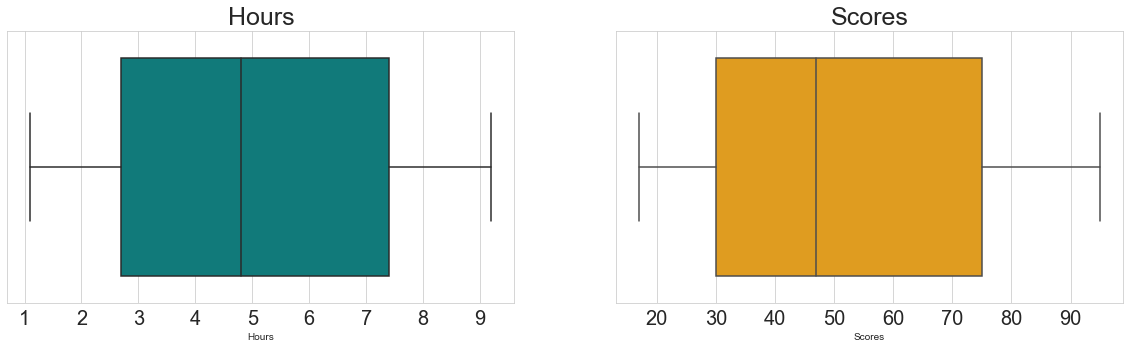

In [7]:
# Outlier Analysis
plt.figure(figsize=(20,5))

# Hours
plt.subplot(1,2,1)
ax=sns.boxplot(data=scores,x='Hours',color='darkcyan')
# ax.xaxis.set_major_locator(ticks.MultipleLocator(0.5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Hours',fontsize=25)

# Scores
plt.subplot(1,2,2)
ax=sns.boxplot(data=scores,x='Scores',color='orange')
ax.xaxis.set_major_locator(ticks.MultipleLocator(10))
plt.title('Scores',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### <font color='purple'>Comment :</font>

- As it can be seen from the box plots that there are no outliers in the data set.

## Univariate Analysis

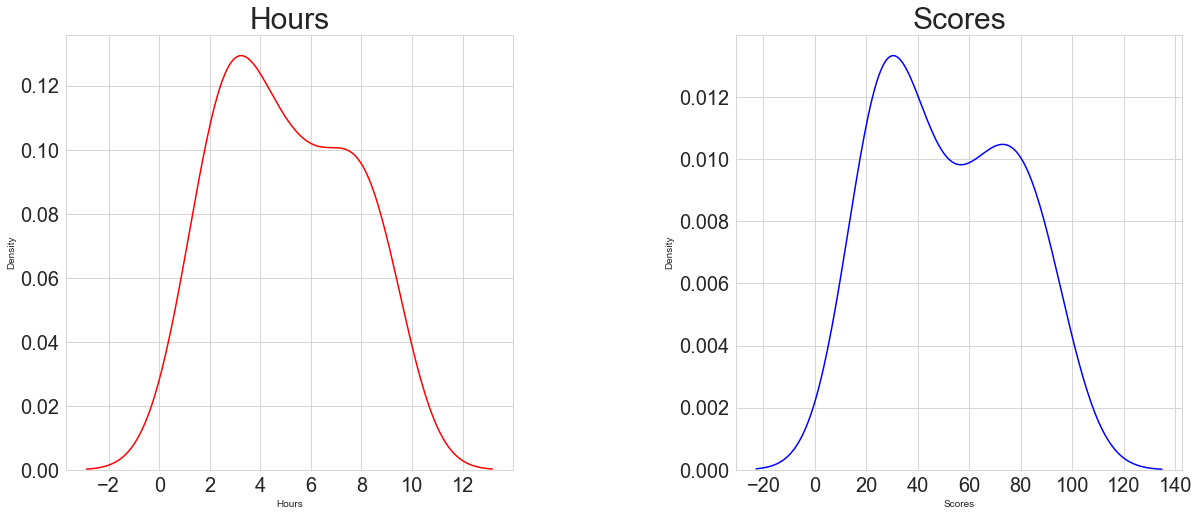

In [8]:
# Plotting the Kde Plot to see the skewness in the data

color=['r','b']

plt.figure(figsize=(20,8))

for ind,val in enumerate(scores.columns):
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    plt.subplot(1,2,ind+1)
    sns.distplot(a=scores[val],hist=False,color=color[ind])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(val,fontsize=30)
plt.show()

## Bivariate Analysis

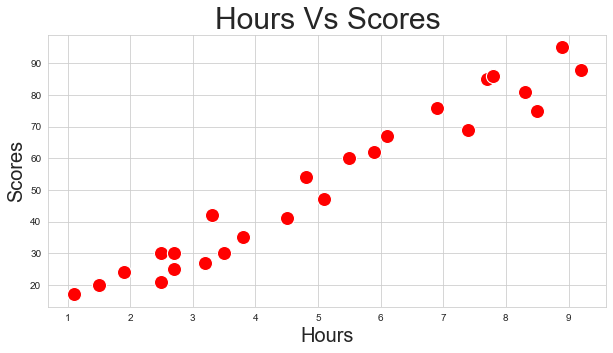

In [9]:
# Scatter plot for the bivariate analysis

plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=scores,x='Hours',y='Scores',color='r',s=200)
plt.title('Hours Vs Scores',fontsize=30)
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

### <font color='purple'>Comment:</font>

There is a pretty high correlation between hours and scores. In the next step let's check the value of correlation between the two features.

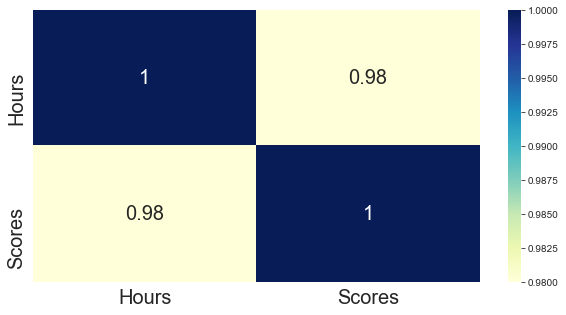

In [10]:
# Checking the correlations
plt.figure(figsize=(10,5))
sns.heatmap(scores.corr().round(2),annot=True,cmap="YlGnBu",annot_kws={'fontsize':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Preparing Data for Modelling

## Splitting the data into train and test

In [11]:
# Splitting the data into test and train
df_train,df_test =train_test_split(scores,train_size=0.7,test_size=0.3,random_state=100)

In [12]:
# Splitting the data into corresponding X and Y

x_train = df_train['Hours']
y_train = df_train['Scores']

# Building the model using statsmodels library

In [13]:
# Building the Simple Linear model

x_train_sm = sm.add_constant(x_train)
lr_model = sm.OLS(y_train,x_train_sm).fit()
y_train_pred = lr_model.predict(x_train_sm)
print('Training Complete.')

Training Complete.


In [14]:
# Checking the summary of the model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        14:55:36   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Equation of the best line

$ Scores = 1.4951 + 9.8717 \times Hours $

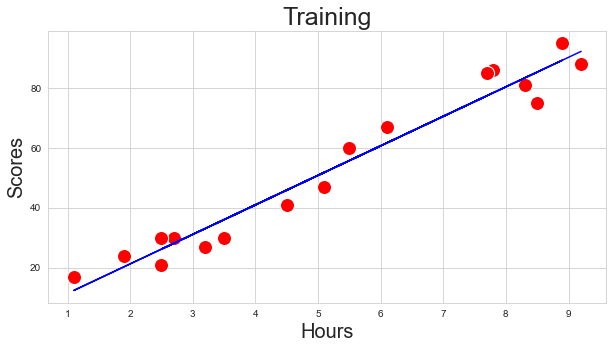

In [15]:
# Plotting the Regression equation for the best line
plt.figure(figsize=(10,5))
sns.scatterplot(x_train,y_train,s=200,color='r')
plt.plot(x_train,lr_model.predict(x_train_sm),'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.title('Training',fontsize=25)
plt.show()

## Predictions on the test data

In [16]:
# Splitting the test dataset into X and Y
x_test = df_test['Hours']
y_test = df_test['Scores']

In [17]:
# Making the predictions 
x_test_sm = sm.add_constant(x_test)

y_test_pred = lr_model.predict(x_test_sm)

y_test_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
dtype: float64

In [18]:
vls = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
vls

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


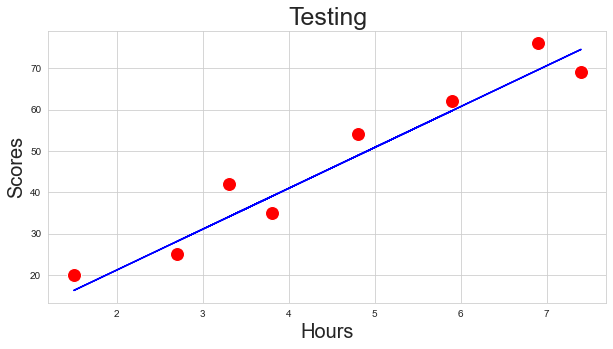

In [19]:
# Plotting the graph
plt.figure(figsize=(10,5))
sns.scatterplot(x_test,y_test,s=200,color='r')
plt.plot(x_test,lr_model.predict(x_test_sm),'b')
plt.title('Testing',fontsize=25)
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

# Model Evaluation

In [20]:
# Calculating the R2 scores for train and test data
print('R2 score for the training data : ',round(r2_score(y_train,y_train_pred),3))
print('R2 score for the testing data : ',round(r2_score(y_test,y_test_pred),3))

R2 score for the training data :  0.957
R2 score for the testing data :  0.931


# Building model using scikit learn library

In [21]:
x=scores['Hours']
y=scores['Scores']

In [22]:
# Building the linear model and train it
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
print('Training is complete.')

Training is complete.


In [23]:
# Getting the best fitted line 
line = lr.intercept_+lr.coef_*x.values.reshape(-1,1)

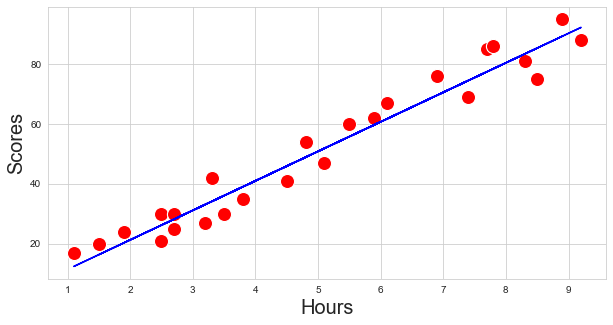

In [24]:
# Plotting the best fitted line on the graph 
plt.figure(figsize=(10,5))
sns.scatterplot(scores['Hours'],scores['Scores'],s=200,color='r')
plt.plot(scores['Hours'],line,'b')
plt.xlabel(xlabel='Hours',fontsize=20)
plt.ylabel(ylabel='Scores',fontsize=20)
plt.show()

# Model Evaluation

In [25]:
print('The R2 score for the train data : ',round(lr.score(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1)),3))
print('The R2 score for the test data : ',round(lr.score(x_test.values.reshape(-1,1),y_test.values.reshape(-1,1)),3))

The R2 score for the train data :  0.957
The R2 score for the test data :  0.931


In [26]:
# Model evaluation using RMSE and RMAE values
print('Mean Squared Error : ',round(MSE(y_test,y_test_pred),3))
print('Mean Absolute Error : ',round(MAE(y_test,y_test_pred),3))
print()
print('Root Mean Squared Error : ',round(np.sqrt(MSE(y_test,y_test_pred)),3))
print('Root Mean Absolute Error : ',round(np.sqrt(MAE(y_test,y_test_pred)),3))

Mean Squared Error :  25.678
Mean Absolute Error :  4.763

Root Mean Squared Error :  5.067
Root Mean Absolute Error :  2.182


# Testing the model on unseen data

In [29]:
# Making predictions 

hours = 9.25

hrs = sm.add_constant(pd.DataFrame({'Hours':[hours]}),has_constant='add')

score = lr_model.predict(hrs)

print('A student is predicted to score {1}% if he/she studies {0} hours a day.'.format(hours,round(score[0],2)))

A student is predicted to score 92.81% if he/she studies 9.25 hours a day.
